In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

%matplotlib inline

In [14]:
# Define Parameters for Each Region
param_dict = {
    'High': [0.1*10e-5, 0.1*10e-5, 0.1*10e-5, 0.1*10e-5, 0.1*10e-5, 0.1*10e-5],
    'Low': [0.1*10e-5, 0.1*10e-5, 0.1*10e-5, 0.1*10e-5, 0.1*10e-5, 0.1*10e-5],
}
                 
# Define SEIAR Population for Each Region
init_pop = {
    'Central_High': [234144, 1, 1, 1, 0],
    'Central_Low': [234144, 1, 1, 1, 0],
    'East_High': [234144, 1, 1, 1, 0],
    'East_Low': [234144, 1, 1, 1, 0],
    'North_Central_High': [234144, 1, 1, 1, 0],
    'North_Central_Low': [234144, 1, 1, 1, 0],
    'North_Coastal_High': [234144, 1, 1, 1, 0],
    'North_Coastal_Low': [234144, 1, 1, 1, 0],
    'North_Inland_High': [234144, 1, 1, 1, 0],
    'North_Inland_Low': [234144, 1, 1, 1, 0],
    'South_High': [234144, 1, 1, 1, 0],
    'South_Low': [234144, 1, 1, 1, 0]
}

In [15]:
########### Extract Corresponding Population ###########

# Central High Risk
S_H_C, E_H_C, I_H_C, A_H_C, R_H_C = init_pop['Central_High'][0],\
                                    init_pop['Central_High'][1],\
                                    init_pop['Central_High'][2],\
                                    init_pop['Central_High'][3],\
                                    init_pop['Central_High'][4]

# Central Low Risk
S_L_C, E_L_C, I_L_C, A_L_C, R_L_C = init_pop['Central_Low'][0],\
                                    init_pop['Central_Low'][1],\
                                    init_pop['Central_Low'][2],\
                                    init_pop['Central_Low'][3],\
                                    init_pop['Central_Low'][4]

# East High Risk
S_H_E, E_H_E, I_H_E, A_H_E, R_H_E = init_pop['East_High'][0],\
                                    init_pop['East_High'][1],\
                                    init_pop['East_High'][2],\
                                    init_pop['East_High'][3],\
                                    init_pop['East_High'][4]

# East Low Risk
S_L_E, E_L_E, I_L_E, A_L_E, R_L_E = init_pop['East_Low'][0],\
                                    init_pop['East_Low'][1],\
                                    init_pop['East_Low'][2],\
                                    init_pop['East_Low'][3],\
                                    init_pop['East_Low'][4]

# North Central High Risk
S_H_NCen, E_H_NCen, I_H_NCen, A_H_NCen, R_H_NCen = init_pop['North_Central_High'][0],\
                                                   init_pop['North_Central_High'][1],\
                                                   init_pop['North_Central_High'][2],\
                                                   init_pop['North_Central_High'][3],\
                                                   init_pop['North_Central_High'][4]

# North Central Low Risk
S_L_NCen, E_L_NCen, I_L_NCen, A_L_NCen, R_L_NCen =  init_pop['North_Central_Low'][0],\
                                                    init_pop['North_Central_Low'][1],\
                                                    init_pop['North_Central_Low'][2],\
                                                    init_pop['North_Central_Low'][3],\
                                                    init_pop['North_Central_Low'][4]

# North Coastal High Risk
S_H_NCoa, E_H_NCoa, I_H_NCoa, A_H_NCoa, R_H_NCoa =  init_pop['North_Coastal_High'][0],\
                                                    init_pop['North_Coastal_High'][1],\
                                                    init_pop['North_Coastal_High'][2],\
                                                    init_pop['North_Coastal_High'][3],\
                                                    init_pop['North_Coastal_High'][4]

# North Coastal Low Risk
S_L_NCoa, E_L_NCoa, I_L_NCoa, A_L_NCoa, R_L_NCoa =  init_pop['North_Coastal_Low'][0],\
                                                    init_pop['North_Coastal_Low'][1],\
                                                    init_pop['North_Coastal_Low'][2],\
                                                    init_pop['North_Coastal_Low'][3],\
                                                    init_pop['North_Coastal_Low'][4]

# North Inland High Risk
S_H_NI, E_H_NI, I_H_NI, A_H_NI, R_H_NI =  init_pop['North_Inland_High'][0],\
                                          init_pop['North_Inland_High'][1],\
                                          init_pop['North_Inland_High'][2],\
                                          init_pop['North_Inland_High'][3],\
                                          init_pop['North_Inland_High'][4]

# North Inland Low Risk
S_L_NI, E_L_NI, I_L_NI, A_L_NI, R_L_NI =  init_pop['North_Inland_Low'][0],\
                                          init_pop['North_Inland_Low'][1],\
                                          init_pop['North_Inland_Low'][2],\
                                          init_pop['North_Inland_Low'][3],\
                                          init_pop['North_Inland_Low'][4]

# South High Risk
S_H_S, E_H_S, I_H_S, A_H_S, R_H_S = init_pop['South_High'][0],\
                                    init_pop['South_High'][1],\
                                    init_pop['South_High'][2],\
                                    init_pop['South_High'][3],\
                                    init_pop['South_High'][4]

# South Low Risk
S_L_S, E_L_S, I_L_S, A_L_S, R_L_S = init_pop['South_Low'][0],\
                                    init_pop['South_Low'][1],\
                                    init_pop['South_Low'][2],\
                                    init_pop['South_Low'][3],\
                                    init_pop['South_Low'][4]

########### Extract Corresponding Parameters ###########

b_IH_H, b_AH_H, g_H, t_H, l_H, d_H = param_dict['High'][0],\
                                     param_dict['High'][1],\
                                     param_dict['High'][2],\
                                     param_dict['High'][3],\
                                     param_dict['High'][4],\
                                     param_dict['High'][5]

b_IH_L, b_AH_L, g_L, t_L, l_L, d_L = param_dict['Low'][0],\
                                     param_dict['Low'][1],\
                                     param_dict['Low'][2],\
                                     param_dict['Low'][3],\
                                     param_dict['Low'][4],\
                                     param_dict['Low'][5]

In [16]:
t = np.linspace(0, 50, 50)

# define ODE system
def deriv_High_and_Low(y, t, b_IH_H, b_AH_H, g_H, t_H, l_H, d_H, \
                             b_IH_L, b_AH_L, g_L, t_L, l_L, d_L):

    # Initial condition
    S_H_C, S_L_C, E_H_C, E_L_C, I_H_C, I_L_C, A_H_C, A_L_C, R_H_C, R_L_C, \
    S_H_E, S_L_E, E_H_E, E_L_E, I_H_E, I_L_E, A_H_E, A_L_E, R_H_E, R_L_E, \
    S_H_NCen, S_L_NCen, E_H_NCen, E_L_NCen, I_H_NCen, I_L_NCen, A_H_NCen, A_L_NCen, R_H_NCen, R_L_NCen, \
    S_H_NCoa, S_L_NCoa, E_H_NCoa, E_L_NCoa, I_H_NCoa, I_L_NCoa, A_H_NCoa, A_L_NCoa, R_H_NCoa, R_L_NCoa, \
    S_H_NI, S_L_NI, E_H_NI, E_L_NI, I_H_NI, I_L_NI, A_H_NI, A_L_NI, R_H_NI, R_L_NI, \
    S_H_S, S_L_S, E_H_S, E_L_S, I_H_S, I_L_S, A_H_S, A_L_S, R_H_S, R_L_S = y    

######## Define Functions (60 ODEs) ########

    dS_H_C = -1 * S_H_C * (b_IH_H * (I_H_C + I_L_C) + b_AH_H * (A_H_C + A_L_C))
    dS_H_E = -1 * S_H_E * (b_IH_H * (I_H_E + I_L_E) + b_AH_H * (A_H_E + A_L_E))
    dS_H_NCen = -1 * S_H_NCen * (b_IH_H * (I_H_NCen + I_L_NCen) + b_AH_H * (A_H_NCen + A_L_NCen))
    dS_H_NCoa = -1 * S_H_NCoa * (b_IH_H * (I_H_NCoa + I_L_NCoa) + b_AH_H * (A_H_NCoa + A_L_NCoa))
    dS_H_NI = -1 * S_H_NI * (b_IH_H * (I_H_NI + I_L_NI) + b_AH_H * (A_H_NI + A_L_NI))
    dS_H_S = -1 * S_H_S * (b_IH_H * (I_H_S + I_L_S) + b_AH_H * (A_H_S + A_L_S))

    dS_L_C = -1 * S_L_C * (b_IH_L * (I_H_C + I_L_C) + b_AH_L * (A_H_C + A_L_C))
    dS_L_E = -1 * S_L_E * (b_IH_L * (I_H_E + I_L_E) + b_AH_L * (A_H_E + A_L_E))
    dS_L_NCen = -1 * S_L_NCen * (b_IH_L * (I_H_NCen + I_L_NCen) + b_AH_L * (A_H_NCen + A_L_NCen))
    dS_L_NCoa = -1 * S_L_NCoa * (b_IH_L * (I_H_NCoa + I_L_NCoa) + b_AH_L * (A_H_NCoa + A_L_NCoa))
    dS_L_NI = -1 * S_L_NI * (b_IH_L * (I_H_NI + I_L_NI) + b_AH_L * (A_H_NI + A_L_NI))
    dS_L_S = -1 * S_L_S * (b_IH_L * (I_H_S + I_L_S) + b_AH_L * (A_H_S + A_L_S))

    dE_H_C = (S_H_C * (b_IH_H * (I_H_C + I_L_C) + b_AH_L * (A_H_C + A_L_C))) - g_H * E_H_C
    dE_H_E = (S_H_E * (b_IH_H * (I_H_E + I_L_E) + b_AH_L * (A_H_E + A_L_E))) - g_H * E_H_E
    dE_H_NCen = (S_H_NCen * (b_IH_H * (I_H_NCen + I_L_NCen) + b_AH_L * (A_H_NCen + A_L_NCen))) - g_H * E_H_NCen
    dE_H_NCoa = (S_H_NCoa * (b_IH_H * (I_H_NCoa + I_L_NCoa) + b_AH_L * (A_H_NCoa + A_L_NCoa))) - g_H * E_H_NCoa
    dE_H_NI = (S_H_NI * (b_IH_H * (I_H_NI + I_L_NI) + b_AH_L * (A_H_NI + A_L_NI))) - g_H * E_H_NI
    dE_H_S = (S_H_S * (b_IH_H * (I_H_S + I_L_S) + b_AH_L * (A_H_S + A_L_S))) - g_H * E_H_S

    dE_L_C = (S_L_C * (b_IH_L * (I_H_C + I_L_C) + b_AH_L * (A_H_C + A_L_C))) - g_L * E_L_C
    dE_L_E = (S_L_E * (b_IH_L * (I_H_E + I_L_E) + b_AH_L * (A_H_E + A_L_E))) - g_L * E_L_E
    dE_L_NCen = (S_L_NCen * (b_IH_L * (I_H_NCen + I_L_NCen) + b_AH_L * (A_H_NCen + A_L_NCen))) - g_L * E_L_NCen
    dE_L_NCoa = (S_L_NCoa * (b_IH_L * (I_H_NCoa + I_L_NCoa) + b_AH_L * (A_H_NCoa + A_L_NCoa))) - g_L * E_L_NCoa
    dE_L_NI = (S_L_NI * (b_IH_L * (I_H_NI + I_L_NI) + b_AH_L * (A_H_NI + A_L_NI))) - g_L * E_L_NI
    dE_L_S = (S_L_S * (b_IH_L * (I_H_S + I_L_S) + b_AH_L * (A_H_S + A_L_S))) - g_L * E_L_S

    dI_H_C = (t_H * g_H * E_H_C) - (l_H * I_H_C) - (d_H * I_H_C)
    dI_H_E = (t_H * g_H * E_H_E) - (l_H * I_H_E) - (d_H * I_H_E)
    dI_H_NCen = (t_H * g_H * E_H_NCen) - (l_H * I_H_NCen) - (d_H * I_H_NCen)
    dI_H_NCoa = (t_H * g_H * E_H_NCoa) - (l_H * I_H_NCoa) - (d_H * I_H_NCoa)
    dI_H_NI = (t_H * g_H * E_H_NI) - (l_H * I_H_NI) - (d_H * I_H_NI)
    dI_H_S = (t_H * g_H * E_H_S) - (l_H * I_H_S) - (d_H * I_H_S)

    dI_L_C = (t_L * g_L * E_L_C) - (l_L * I_L_C) - (d_L * I_L_C)
    dI_L_E = (t_L * g_L * E_L_E) - (l_L * I_L_E) - (d_L * I_L_E)
    dI_L_NCen = (t_L * g_L * E_L_NCen) - (l_L * I_L_NCen) - (d_L * I_L_NCen)
    dI_L_NCoa = (t_L * g_L * E_L_NCoa) - (l_L * I_L_NCoa) - (d_L * I_L_NCoa)
    dI_L_NI = (t_L * g_L * E_L_NI) - (l_L * I_L_NI) - (d_L * I_L_NI)
    dI_L_S = (t_L * g_L * E_L_S) - (l_L * I_L_S) - (d_L * I_L_S)

    dA_H_C = ((1 - t_H) * g_H * E_H_C) - (l_H * A_H_C)
    dA_H_E = ((1 - t_H) * g_H * E_H_E) - (l_H * A_H_E)
    dA_H_NCen = ((1 - t_H) * g_H * E_H_NCen) - (l_H * A_H_NCen)
    dA_H_NCoa = ((1 - t_H) * g_H * E_H_NCoa) - (l_H * A_H_NCoa)
    dA_H_NI = ((1 - t_H) * g_H * E_H_NI) - (l_H * A_H_NI)
    dA_H_S = ((1 - t_H) * g_H * E_H_S) - (l_H * A_H_S)

    dA_L_C = ((1 - t_L) * g_L * E_L_C) - (l_L * A_L_C)
    dA_L_E = ((1 - t_L) * g_L * E_L_E) - (l_L * A_L_E)
    dA_L_NCen = ((1 - t_L) * g_L * E_L_NCen) - (l_L * A_L_NCen)
    dA_L_NCoa = ((1 - t_L) * g_L * E_L_NCoa) - (l_L * A_L_NCoa)
    dA_L_NI = ((1 - t_L) * g_L * E_L_NI) - (l_L * A_L_NI)
    dA_L_S = ((1 - t_L) * g_L * E_L_S) - (l_L * A_L_S)

    dR_H_C = l_H * (I_H_C + A_H_C)
    dR_H_E = l_H * (I_H_E + A_H_E)
    dR_H_NCen = l_H * (I_H_NCen + A_H_NCen)
    dR_H_NCoa = l_H * (I_H_NCoa + A_H_NCoa)
    dR_H_NI = l_H * (I_H_NI + A_H_NI)
    dR_H_S = l_H * (I_H_S + A_H_S)

    dR_L_C = l_L * (I_L_C + A_L_C)
    dR_L_E = l_L * (I_L_E + A_L_E)
    dR_L_NCen = l_L * (I_L_NCen + A_L_NCen)
    dR_L_NCoa = l_L * (I_L_NCoa + A_L_NCoa)
    dR_L_NI = l_L * (I_L_NI + A_L_NI)
    dR_L_S = l_L * (I_L_S + A_L_S)

######## Define Functions (End) ########

    return  dS_H_C, dS_L_C, dE_H_C, dE_L_C, dI_H_C, dI_L_C, dA_H_C, dA_L_C, dR_H_C, dR_L_C, \
            dS_H_E, dS_L_E, dE_H_E, dE_L_E, dI_H_E, dI_L_E, dA_H_E, dA_L_E, dR_H_E, dR_L_E, \
            dS_H_NCen, dS_L_NCen, dE_H_NCen, dE_L_NCen, dI_H_NCen, dI_L_NCen, dA_H_NCen, dA_L_NCen, dR_H_NCen, dR_L_NCen, \
            dS_H_NCoa, dS_L_NCoa, dE_H_NCoa, dE_L_NCoa, dI_H_NCoa, dI_L_NCoa, dA_H_NCoa, dA_L_NCoa, dR_H_NCoa, dR_L_NCoa, \
            dS_H_NI, dS_L_NI, dE_H_NI, dE_L_NI, dI_H_NI, dI_L_NI, dA_H_NI, dA_L_NI, dR_H_NI, dR_L_NI, \
            dS_H_S, dS_L_S, dE_H_S, dE_L_S, dI_H_S, dI_L_S, dA_H_S, dA_L_S, dR_H_S, dR_L_S

In [17]:
# combine initial condition
y0 = S_H_C, S_L_C, E_H_C, E_L_C, I_H_C, I_L_C, A_H_C, A_L_C, R_H_C, R_L_C, \
     S_H_E, S_L_E, E_H_E, E_L_E, I_H_E, I_L_E, A_H_E, A_L_E, R_H_E, R_L_E, \
     S_H_NCen, S_L_NCen, E_H_NCen, E_L_NCen, I_H_NCen, I_L_NCen, A_H_NCen, A_L_NCen, R_H_NCen, R_L_NCen, \
     S_H_NCoa, S_L_NCoa, E_H_NCoa, E_L_NCoa, I_H_NCoa, I_L_NCoa, A_H_NCoa, A_L_NCoa, R_H_NCoa, R_L_NCoa, \
     S_H_NI, S_L_NI, E_H_NI, E_L_NI, I_H_NI, I_L_NI, A_H_NI, A_L_NI, R_H_NI, R_L_NI, \
     S_H_S, S_L_S, E_H_S, E_L_S, I_H_S, I_L_S, A_H_S, A_L_S, R_H_S, R_L_S

# solve ODE
ret = odeint(deriv_High_and_Low, y0, t, args=(b_IH_H, b_AH_H, g_H, t_H, l_H, d_H, \
                                              b_IH_L, b_AH_L, g_L, t_L, l_L, d_L))
                                              
dS_H_C, dS_L_C, dE_H_C, dE_L_C, dI_H_C, dI_L_C, dA_H_C, dA_L_C, dR_H_C, dR_L_C, \
dS_H_E, dS_L_E, dE_H_E, dE_L_E, dI_H_E, dI_L_E, dA_H_E, dA_L_E, dR_H_E, dR_L_E, \
dS_H_NCen, dS_L_NCen, dE_H_NCen, dE_L_NCen, dI_H_NCen, dI_L_NCen, dA_H_NCen, dA_L_NCen, dR_H_NCen, dR_L_NCen, \
dS_H_NCoa, dS_L_NCoa, dE_H_NCoa, dE_L_NCoa, dI_H_NCoa, dI_L_NCoa, dA_H_NCoa, dA_L_NCoa, dR_H_NCoa, dR_L_NCoa, \
dS_H_NI, dS_L_NI, dE_H_NI, dE_L_NI, dI_H_NI, dI_L_NI, dA_H_NI, dA_L_NI, dR_H_NI, dR_L_NI, \
dS_H_S, dS_L_S, dE_H_S, dE_L_S, dI_H_S, dI_L_S, dA_H_S, dA_L_S, dR_H_S, dR_L_S = ret.T

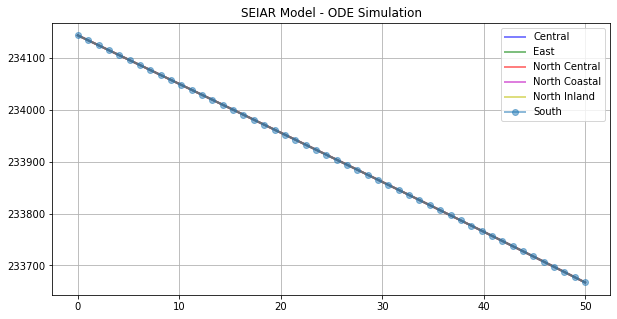

In [18]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title(f'SEIAR Model - ODE Simulation')
ax.plot(t, dS_H_C, 'b-', alpha=0.5, lw=2, label='Central')
ax.plot(t, dS_H_E, 'g-', alpha=0.5, lw=2, label='East')
ax.plot(t, dS_H_NCen, 'r-', alpha=0.5, lw=2, label='North Central')
ax.plot(t, dS_H_NCoa, 'm-', alpha=0.5, lw=2, label='North Coastal')
ax.plot(t, dS_H_NI, 'y-', alpha=0.5, lw=2, label='North Inland')
ax.plot(t, dS_H_S, 'o-', alpha=0.5, lw=2, label='South')
ax.legend()
ax.grid()
plt.show()